# Adidas Sell Analysis

## Importing The Libraries And Dataset

In [398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [399]:
dataset = pd.read_csv('adidas.csv')

## Analysing The Dataset

In [400]:
dataset

,url,name,sku,selling_price,original_price,currency,availability,color,category,source,source_website,breadcrumbs,description,brand,images,country,language,average_rating,reviews_count,crawled_at
0,https://www.adidas.com/us/beach-shorts/FJ5089....,Beach Shorts,FJ5089,40,NaN,USD,InStock,Black,Clothing,adidas United States,https://www.adidas.com,Women/Clothing,Splashing in the surf. Making memories with yo...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.5,35,2021-10-23 17:50:17.331255
1,https://www.adidas.com/us/five-ten-kestrel-lac...,Five Ten Kestrel Lace Mountain Bike Shoes,BC0770,150,NaN,USD,InStock,Grey,Shoes,adidas United States,https://www.adidas.com,Women/Shoes,Lace up and get after it. The Five Ten Kestrel...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.8,4,2021-10-23 17:50:17.423830
2,https://www.adidas.com/us/mexico-away-jersey/G...,Mexico Away Jersey,GC7946,70,NaN,USD,InStock,White,Clothing,adidas United States,https://www.adidas.com,Kids/Clothing,"Clean and crisp, this adidas Mexico Away Jerse...",adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.9,42,2021-10-23 17:50:17.530834
3,https://www.adidas.com/us/five-ten-hiangle-pro...,Five Ten Hiangle Pro Competition Climbing Shoes,FV4744,160,NaN,USD,InStock,Black,Shoes,adidas United States,https://www.adidas.com,Five Ten/Shoes,The Hiangle Pro takes on the classic shape of ...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,3.7,7,2021-10-23 17:50:17.615054
4,https://www.adidas.com/us/mesh-broken-stripe-p...,Mesh Broken-Stripe Polo Shirt,GM0239,65,NaN,USD,InStock,Blue,Clothing,adidas United States,https://www.adidas.com,Men/Clothing,Step up to the tee relaxed. This adidas golf p...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.7,11,2021-10-23 17:50:17.702680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,https://www.adidas.com/us/supernova-plus-shoes...,Supernova+ Shoes,FX2858,72,$120,USD,InStock,White,Shoes,adidas United States,https://www.adidas.com,Women/Shoes,Take off. Touch down. Repeat. These adidas run...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.3,151,2021-10-23 17:52:31.937924
841,https://www.adidas.com/us/choigo-shoes/H00667....,Choigo Shoes,H00667,70,$100,USD,InStock,White,Shoes,adidas United States,https://www.adidas.com,Women/Shoes,"If you want drama, the bold female track and f...",adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.7,135,2021-10-23 17:52:32.014973
842,https://www.adidas.com/us/daily-3.0-shoes/GZ77...,Daily 3.0 Shoes,GZ7705,35,$50,USD,InStock,Black,Shoes,adidas United States,https://www.adidas.com,Kids/Shoes,The style is in the details of the Daily 3.0 S...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.7,190,2021-10-23 17:52:32.208426
843,https://www.adidas.com/us/daily-3.0-shoes/GZ77...,Daily 3.0 Shoes,GZ7706,40,$50,USD,InStock,Pink,Shoes,adidas United States,https://www.adidas.com,Kids/Shoes,The style is in the details of the Daily 3.0 S...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.7,190,2021-10-23 17:52:32.293622


## Dataset Information

In [401]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   url             845 non-null    object 
 1   name            845 non-null    object 
 2   sku             845 non-null    object 
 3   selling_price   845 non-null    int64  
 4   original_price  829 non-null    object 
 5   currency        845 non-null    object 
 6   availability    845 non-null    object 
 7   color           845 non-null    object 
 8   category        845 non-null    object 
 9   source          845 non-null    object 
 10  source_website  845 non-null    object 
 11  breadcrumbs     845 non-null    object 
 12  description     845 non-null    object 
 13  brand           845 non-null    object 
 14  images          845 non-null    object 
 15  country         845 non-null    object 
 16  language        845 non-null    object 
 17  average_rating  845 non-null    flo

In [402]:
dataset.describe()

,selling_price,average_rating,reviews_count
count,845.000000,845.000000,845.000000
mean,53.192899,4.608402,426.178698
std,31.411645,0.293795,1229.158277
min,9.000000,1.000000,1.000000
25%,28.000000,4.500000,19.000000
50%,48.000000,4.700000,68.000000
75%,70.000000,4.800000,314.000000
max,240.000000,5.000000,11750.000000


## Heatmat Of The Dataset

<AxesSubplot:>

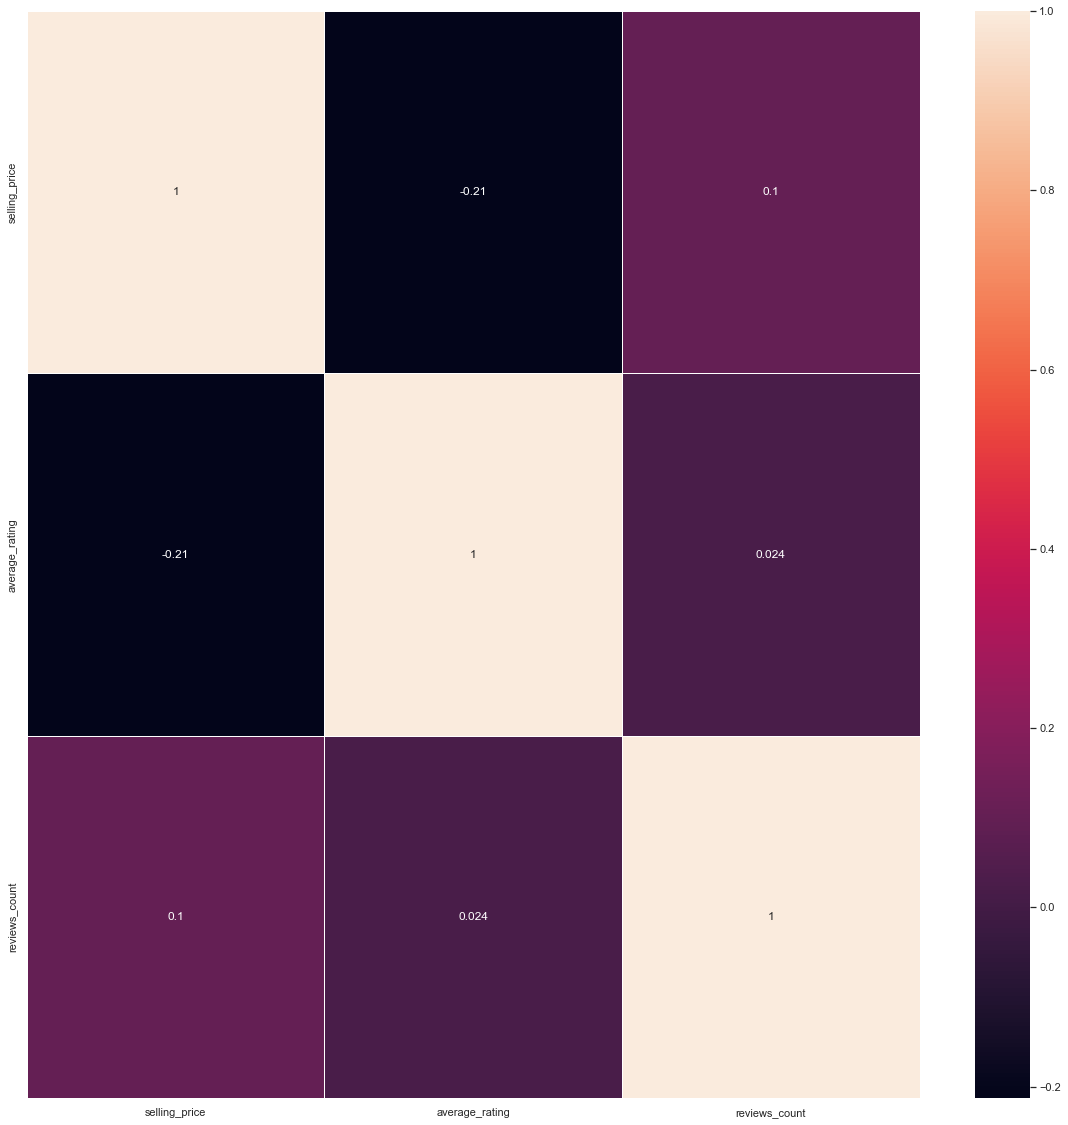

In [403]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(dataset.corr(),annot = True, linewidths=.5, ax=ax)

## Finding The Number Of Categorical Data

In [404]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 17
Integer variables: 2
Float variables: 1


<AxesSubplot:title={'center':'No. Unique values of Categorical Features'}>

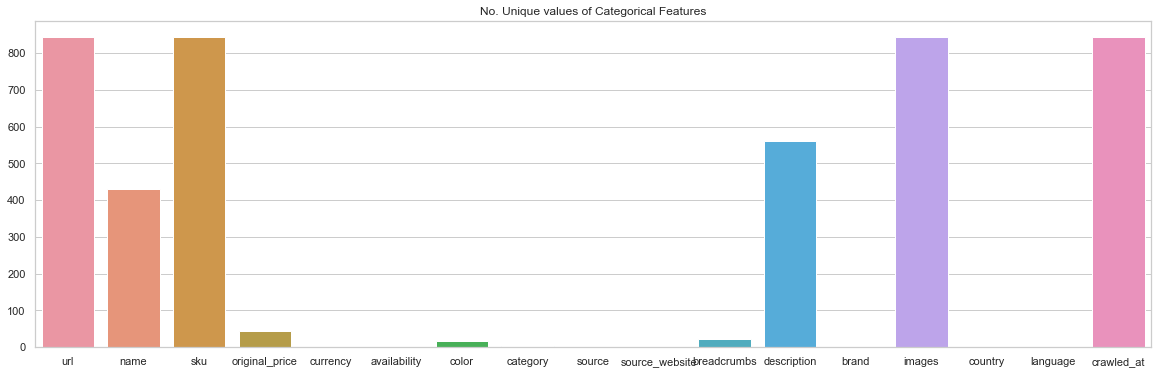

In [405]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(20,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=0)
sns.barplot(x=object_cols,y=unique_values)

## Selling Price Density

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

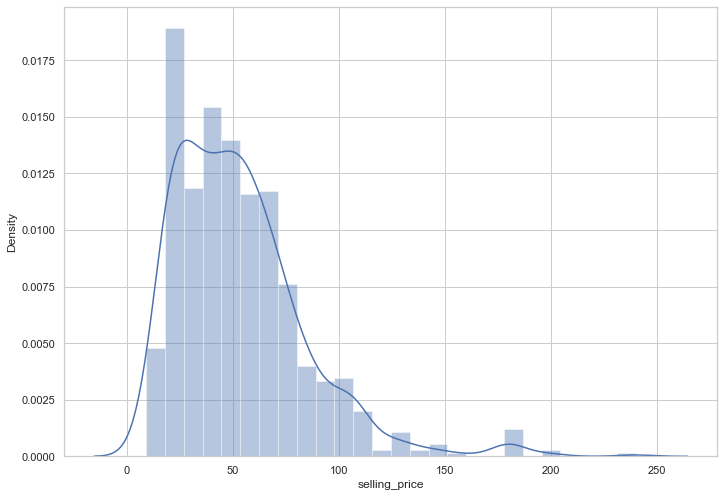

In [406]:
sns.distplot(dataset['selling_price'])

## Checking For The Missing Values

In [407]:
dataset.isnull().sum()

url                0
name               0
sku                0
selling_price      0
original_price    16
currency           0
availability       0
color              0
category           0
source             0
source_website     0
breadcrumbs        0
description        0
brand              0
images             0
country            0
language           0
average_rating     0
reviews_count      0
crawled_at         0
dtype: int64

**We cannot replace original price with the mean of the column. So, we'll assume that the selling price and original price is same for that product**

## Dropping The Features Which Are Not Usefull

In [408]:
dataset.drop(['url','sku','currency','availability','color','source_website','images','language','country'], inplace=True,axis= 1)

In [409]:
dataset

,name,selling_price,original_price,category,source,breadcrumbs,description,brand,average_rating,reviews_count,crawled_at
0,Beach Shorts,40,NaN,Clothing,adidas United States,Women/Clothing,Splashing in the surf. Making memories with yo...,adidas,4.5,35,2021-10-23 17:50:17.331255
1,Five Ten Kestrel Lace Mountain Bike Shoes,150,NaN,Shoes,adidas United States,Women/Shoes,Lace up and get after it. The Five Ten Kestrel...,adidas,4.8,4,2021-10-23 17:50:17.423830
2,Mexico Away Jersey,70,NaN,Clothing,adidas United States,Kids/Clothing,"Clean and crisp, this adidas Mexico Away Jerse...",adidas,4.9,42,2021-10-23 17:50:17.530834
3,Five Ten Hiangle Pro Competition Climbing Shoes,160,NaN,Shoes,adidas United States,Five Ten/Shoes,The Hiangle Pro takes on the classic shape of ...,adidas,3.7,7,2021-10-23 17:50:17.615054
4,Mesh Broken-Stripe Polo Shirt,65,NaN,Clothing,adidas United States,Men/Clothing,Step up to the tee relaxed. This adidas golf p...,adidas,4.7,11,2021-10-23 17:50:17.702680
...,...,...,...,...,...,...,...,...,...,...,...
840,Supernova+ Shoes,72,$120,Shoes,adidas United States,Women/Shoes,Take off. Touch down. Repeat. These adidas run...,adidas,4.3,151,2021-10-23 17:52:31.937924
841,Choigo Shoes,70,$100,Shoes,adidas United States,Women/Shoes,"If you want drama, the bold female track and f...",adidas,4.7,135,2021-10-23 17:52:32.014973
842,Daily 3.0 Shoes,35,$50,Shoes,adidas United States,Kids/Shoes,The style is in the details of the Daily 3.0 S...,adidas,4.7,190,2021-10-23 17:52:32.208426
843,Daily 3.0 Shoes,40,$50,Shoes,adidas United States,Kids/Shoes,The style is in the details of the Daily 3.0 S...,adidas,4.7,190,2021-10-23 17:52:32.293622


## Unique Categories

In [410]:
dataset.category.unique()

array(['Clothing', 'Shoes', 'Accessories'], dtype=object)

**We can see that there are three categories of product in our dataset**

## Grouping The Data By Category

In [411]:
group = dataset.groupby('category')
Clothing = group.get_group('Clothing')
Shoes = group.get_group('Shoes')
Accessories = group.get_group('Accessories')

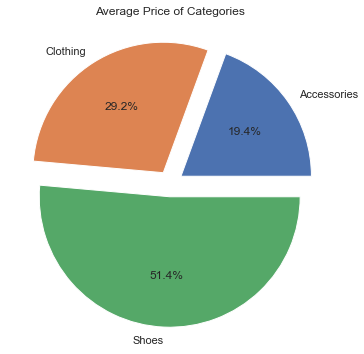

In [412]:
group = dataset.groupby(dataset['category'])
Avgp=group.mean()
plt.subplots(figsize=(10,6));
selling_price=np.array(Avgp.selling_price)
label=Avgp.index
plt.pie(x=selling_price,autopct="%.1f%%", explode=[0.10]*3,labels=label)
plt.title('Average Price of Categories')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


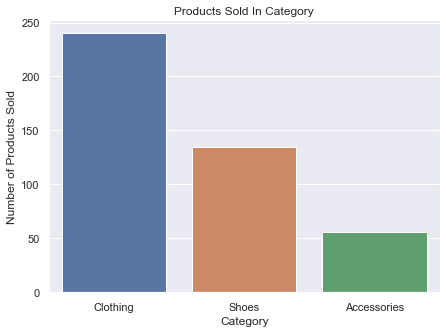

In [413]:
n=Clothing['name'].value_counts().count()
a=Shoes['name'].value_counts().count()
b=Accessories['name'].value_counts().count()

Products=[n,a,b]
Category=['Clothing','Shoes','Accessories'];
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(Category,Products).set(xlabel='Category', ylabel='Number of Products Sold');
plt.title('Products Sold In Category');


## Commom Products

## Commom Products In Clothing

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


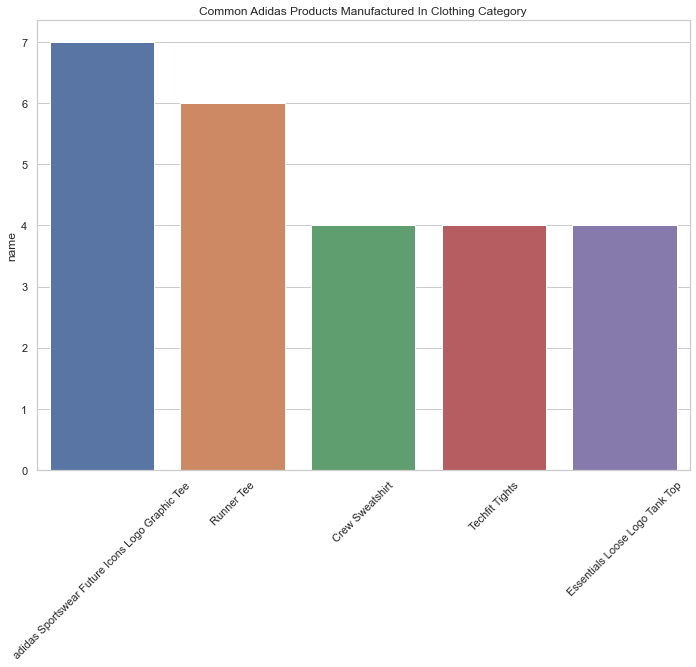

In [414]:
Products=Clothing['name'].value_counts().head()
sns.set(rc={'figure.figsize':(11.7,8.27)});
sns.set_theme(style='whitegrid')
sns.barplot(Products.index,Products).tick_params(axis='x', rotation=45);
plt.title('Common Adidas Products Manufactured In Clothing Category');

## Commom Products In Shoes

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


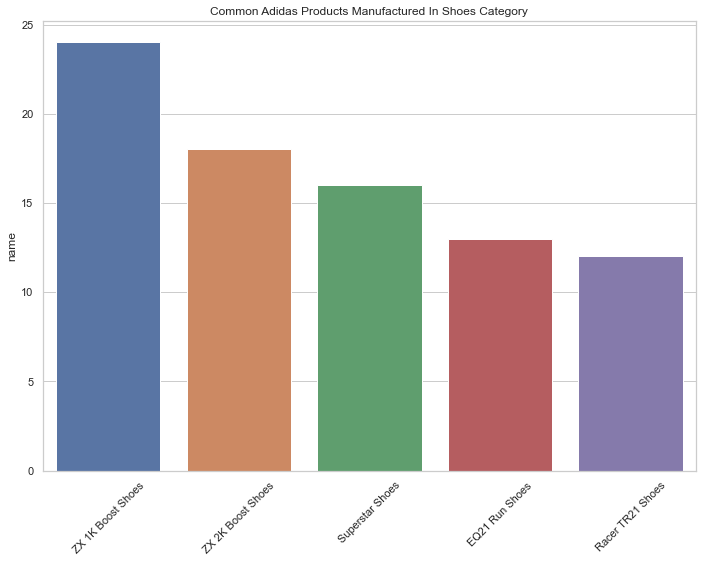

In [415]:
Products=Shoes['name'].value_counts().head()
sns.set(rc={'figure.figsize':(11.7,8.27)});
sns.set_theme(style='whitegrid')
sns.barplot(Products.index,Products).tick_params(axis='x', rotation=45);
plt.title('Common Adidas Products Manufactured In Shoes Category');

## Commom Products In Accessories

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


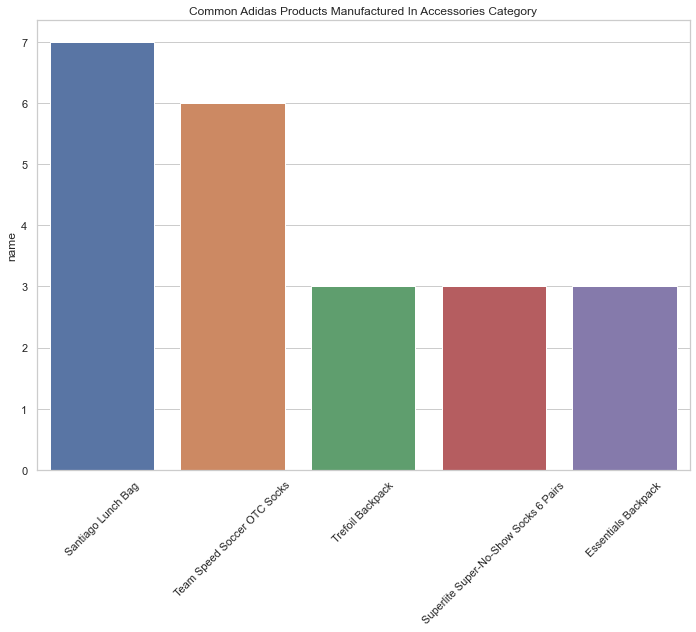

In [416]:
Products=Accessories['name'].value_counts().head()
sns.set(rc={'figure.figsize':(11.7,8.27)});
sns.set_theme(style='whitegrid')
sns.barplot(Products.index,Products).tick_params(axis='x', rotation=45);
plt.title('Common Adidas Products Manufactured In Accessories Category');

## Average Selling Price Of The Categories Of Products

## Clothing

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


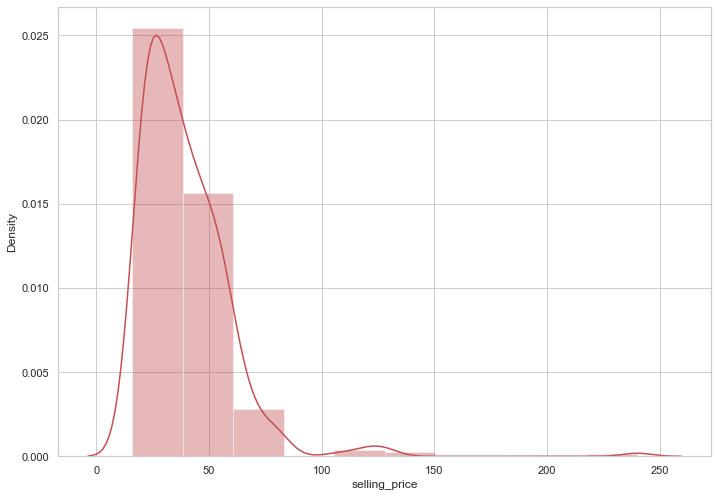

In [417]:
sns.set_style('whitegrid')
sns.distplot(Clothing['selling_price'],bins=10,color='r');


## Shoes

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


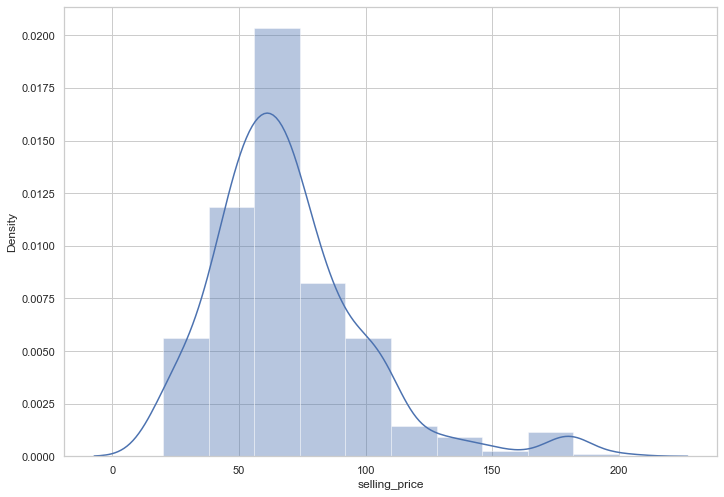

In [418]:
sns.set_style('whitegrid')
sns.distplot(Shoes['selling_price'],bins=10,color='b');


## Accessories

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


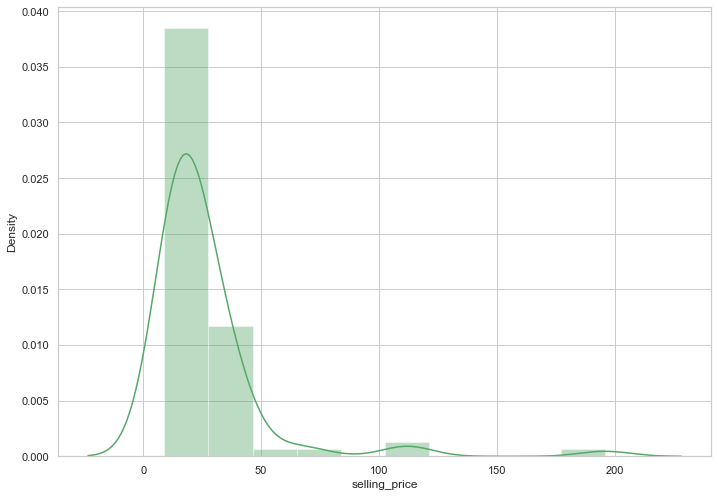

In [419]:
sns.set_style('whitegrid')
sns.distplot(Accessories['selling_price'],bins=10,color='g');


## Average Rating Of Categories

## Average Rating Of Clothing Products

In [420]:
Clothing[['average_rating','reviews_count']].describe()

,average_rating,reviews_count
count,337.000000,337.000000
mean,4.636202,66.810089
std,0.350842,138.405179
min,1.000000,1.000000
25%,4.500000,8.000000
50%,4.700000,29.000000
75%,4.800000,66.000000
max,5.000000,1352.000000


## Average Rating Of Shoes Products

In [421]:
Shoes[['average_rating','reviews_count']].describe()

,average_rating,reviews_count
count,426.000000,426.000000
mean,4.544601,783.014085
std,0.235310,1651.375340
min,3.700000,1.000000
25%,4.400000,77.250000
50%,4.600000,251.000000
75%,4.700000,583.000000
max,5.000000,11750.000000


## Average Rating Of Accessories Products

In [422]:
Accessories[['average_rating','reviews_count']].describe()

,average_rating,reviews_count
count,82.00000,82.000000
mean,4.82561,49.292683
std,0.16087,60.763148
min,4.00000,1.000000
25%,4.80000,7.500000
50%,4.80000,36.000000
75%,5.00000,59.750000
max,5.00000,298.000000


## Highest Rated Products In Its Category

## Highest Rated Clothing Products

In [423]:
Highest_Rated_product=Clothing.average_rating.max()
clothing_Highest_Rated= Clothing[Clothing.average_rating==Highest_Rated_product]
for product in clothing_Highest_Rated['name']:
    print(product)

Inter Miami CF Home Authentic Jersey
Essentials 3-Stripes Full-Zip Hoodie
Essentials 3-Stripes Full-Zip Hoodie
Crew Sweatshirt
Allover Print Camo Shorts and Tee Set
adidas Sportswear W.N.D. Windbreaker
adidas x Classic LEGO® Track Suit
Hoodie
adidas x Zoe Saldana AEROREADY Sport Tee
adidas x Zoe Saldana AEROREADY Sport Tee
adidas Connected Through Sport Long Sleeve Graphic Tee
Allover Print SST Pants
Lil Stripe Ignite SZN Hoodie
Lil Stripe Ignite SZN Hoodie
Lil Stripe Ignite SZN Hoodie
Primegreen Essentials Comfort Fleece Loose Cropped 3-Stripes Sweatshirt
adidas x Zoe Saldana Feelbrilliant AEROREADY 7/8 Printed Sport Tights (Plus Size)
Jayhawks Quarter-Zip Knit Sweatshirt
Traveer WIND.RDY Jacket
Graphic Tee and Shorts Set
adidas x Classic LEGO® Tights
Camo Print Graphic Tee
Crew Sweatshirt
Crew Sweatshirt
Long Sleeve Dress
Long Sleeve Dress
Leggings
Long Sleeve Dress
Leggings
Crew Sweatshirt
adidas Sportswear Seasonals Stadium Hooded Track Jacket (Plus Size)
Terrex Primeknit Rain.RDY 

## Highest Rated Shoes Products

In [424]:
Highest_Rated_product=Shoes.average_rating.max()
shoes_Highest_Rated= Shoes[Shoes.average_rating==Highest_Rated_product]
for product in shoes_Highest_Rated['name']:
    print(product)

Marvel Superhero Racer TR 2.0 Shoes
ZX 1K Boost Shoes
ZX 1K Boost Shoes
ZX 1K Boost Shoes
Stan Smith Shoes
ZX 8000 Shoes
Stan Smith Primeblue Shoes
Swift Run X Shoes
ZX 1K Boost Shoes
adidas Superstar x LEGO® Shoes


## Highest Rated Accessories Products

In [425]:
Highest_Rated_product=Accessories.average_rating.max()
Accessories_Highest_Rated= Accessories[Accessories.average_rating==Highest_Rated_product]
for product in Accessories_Highest_Rated['name']:
    print(product)

Tour Camo-Print Hat
Conext 21 Mini Ball
Classic Waist Bag
Santiago Lunch Bag
Santiago Lunch Bag
Sport Duffel Bag
Superlite Low-Cut Socks 6 Pairs
3-Stripes Crew Socks 3 Pairs
Blue Version Luxe Backpack
Marble Wash Mini Hat
Santiago Lunch Bag
Santiago Lunch Bag
Santiago Lunch Bag
Santiago Lunch Bag
Santiago Lunch Bag
Relaxed Marble Wash Hat
Originals Sunglasses OR0032
Cushioned X Mid-Crew Socks 3 Pairs
Relaxed Marble Wash Hat
Originals Sunglasses OR0032
R.Y.V. Sling Pack
Jacquard Trefoil Crew Socks 2 Pairs


## Cleaning The Text

In [426]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 845):
  name = re.sub('[^a-zA-Z]', ' ', dataset['name'][i])
  name = name.lower()
  name = name.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  name = [ps.stem(word) for word in name if not word in set(all_stopwords)]
  name = ' '.join(name)
  corpus.append(name)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mdehteshamansari00/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [427]:
print(corpus)

['beach short', 'five ten kestrel lace mountain bike shoe', 'mexico away jersey', 'five ten hiangl pro competit climb shoe', 'mesh broken stripe polo shirt', 'eqt spikeless golf shoe', 'adicross hybrid short', 'tiro windbreak', 'classic stripe swimsuit', 'tiro windbreak', 'formot sculpt biker short tight', 'athlet cushion crew sock pair', 'inter miami cf home authent jersey', 'cushion mid crew sock pair', 'tour camo print hat', 'essenti loos logo tank top', 'essenti loos logo tank top', 'superstar shoe', 'essenti loos logo tank top', 'formot sculpt tight', 'marvel x ghost firm ground cleat', 'pureboost shoe', 'lite racer byd shoe', 'adilett shower slide', 'essenti loos logo tank top', 'conext mini ball', 'essenti logo dress', 'copa sens turf shoe', 'best version slogan graphic tank top', 'essenti stripe full zip hoodi', 'best version slogan graphic tank top', 'adida sportswear futur icon logo graphic tee', 'futurenatur shoe', 'marvel superhero racer tr shoe', 'primegreen essenti warm s

In [428]:
def partition(x):
    if x<3.5:
        return 0
    return 1
actualscore = dataset['average_rating']
positivenegative = actualscore.map(partition)
dataset['average_rating'] = positivenegative
print("The number of datapoints in the data: ",dataset.shape)
dataset.head()

The number of datapoints in the data:  (845, 11)


,name,selling_price,original_price,category,source,breadcrumbs,description,brand,average_rating,reviews_count,crawled_at
0,Beach Shorts,40,NaN,Clothing,adidas United States,Women/Clothing,Splashing in the surf. Making memories with yo...,adidas,1,35,2021-10-23 17:50:17.331255
1,Five Ten Kestrel Lace Mountain Bike Shoes,150,NaN,Shoes,adidas United States,Women/Shoes,Lace up and get after it. The Five Ten Kestrel...,adidas,1,4,2021-10-23 17:50:17.423830
2,Mexico Away Jersey,70,NaN,Clothing,adidas United States,Kids/Clothing,"Clean and crisp, this adidas Mexico Away Jerse...",adidas,1,42,2021-10-23 17:50:17.530834
3,Five Ten Hiangle Pro Competition Climbing Shoes,160,NaN,Shoes,adidas United States,Five Ten/Shoes,The Hiangle Pro takes on the classic shape of ...,adidas,1,7,2021-10-23 17:50:17.615054
4,Mesh Broken-Stripe Polo Shirt,65,NaN,Clothing,adidas United States,Men/Clothing,Step up to the tee relaxed. This adidas golf p...,adidas,1,11,2021-10-23 17:50:17.702680


In [429]:
dataset.drop(['name','original_price','source','description','brand','reviews_count','crawled_at'],inplace=True,axis=1)

In [430]:
dataset

,selling_price,category,breadcrumbs,average_rating
0,40,Clothing,Women/Clothing,1
1,150,Shoes,Women/Shoes,1
2,70,Clothing,Kids/Clothing,1
3,160,Shoes,Five Ten/Shoes,1
4,65,Clothing,Men/Clothing,1
...,...,...,...,...
840,72,Shoes,Women/Shoes,1
841,70,Shoes,Women/Shoes,1
842,35,Shoes,Kids/Shoes,1
843,40,Shoes,Kids/Shoes,1


## Bag Of Words

In [431]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -3].values

In [432]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

## Randomforest Model

In [433]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

## Predicting the Test Set results

In [434]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Accessories']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Accessories' 'Accessories']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes

In [435]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 19   5   0]
 [  0 101   0]
 [  0   0 129]]


0.9803149606299213

## K Nearest Neighbour

In [436]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test Set results

In [437]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Shoes' 'Clothing']
 ['Shoes' 'Accessories']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Shoes' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Accessories' 'Accessories']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Sho

In [438]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 20   3   1]
 [  1  98   2]
 [  0   0 129]]


0.9724409448818898

## Support Vector Machine

In [439]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting the Test Set results

In [440]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Accessories']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Accessories' 'Accessories']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes

In [441]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 20   4   0]
 [  1 100   0]
 [  0   0 129]]


0.9803149606299213

## Logistic Regression

In [442]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting the Test Set results

In [443]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Accessories']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Accessories' 'Accessories']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes

In [444]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 20   4   0]
 [  0 101   0]
 [  0   0 129]]


0.984251968503937

## Naive Bayes

In [445]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

## Predicting the Test Set results

In [446]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Accessories' 'Accessories']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Accessories' 'Accessories']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Clothing' 'Clothing']
 ['Shoes' 'Shoes']
 ['Clothing' 'Clothing']
 ['Shoes' 'Sh

In [447]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 24   0   0]
 [  2  99   0]
 [  0   1 128]]


0.9881889763779528

## We Ananlysed 

## Accuracy score of Randomforest: - 0.98
## Accuracy score of KNN: - 0.97
## Accuracy score of Support Vector Machine: - 0.98
## Accuracy score of Logistic Regression: - 0.984
## Accuracy score of Naive Bayes: - 0.988